# MSiA 423 - Cloud Engineering for Data Science - Final Project
## Group 7: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# General EDA

In [1]:
# Libraries 
import numpy as np
import pandas as pd
import zipfile
import time

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
## Reading the csv file directly from the zip file without extracting it
#archive = zipfile.ZipFile('../02_Data/archive.zip', 'r')
#files = archive.namelist()
#with archive.open(files[0]) as csvfile:   
#    df = pd.read_csv(csvfile)

#df.head()

In [3]:
# Read clean data
df = pd.read_csv("../02_Data/clean_data.csv")
df.head()

,book_date,airline,flight,class,departure_time,origin,duration,stops,arrival_time,destination,price
0,11-02-2022,Air India,AI-868,Business,Evening,Delhi,2.00,0,Night,Mumbai,25612
1,11-02-2022,Air India,AI-624,Business,Evening,Delhi,2.25,0,Night,Mumbai,25612
2,11-02-2022,Air India,AI-531,Business,Night,Delhi,24.75,1,Night,Mumbai,42220
3,11-02-2022,Air India,AI-839,Business,Night,Delhi,26.50,1,Night,Mumbai,44450
4,11-02-2022,Air India,AI-544,Business,Evening,Delhi,6.67,1,Night,Mumbai,46690


In [4]:
# Remove unnamed column 
#df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
# Number of observations & features 
df.shape

(300261, 11)

In [6]:
# Data types 
df.dtypes

book_date          object
airline            object
flight             object
class              object
departure_time     object
origin             object
duration          float64
stops               int64
arrival_time       object
destination        object
price               int64
dtype: object

In [7]:
# Check missing values 
df.isna().sum()

book_date         0
airline           0
flight            0
class             0
departure_time    0
origin            0
duration          0
stops             0
arrival_time      0
destination       0
price             0
dtype: int64

In [8]:
# Summary statistics for numerical variables 
df.describe()

,duration,stops,price
count,300261.000000,300261.000000,300261.000000
mean,12.217794,0.924213,20883.717666
std,7.192961,0.398188,22695.911266
min,0.830000,0.000000,1105.000000
25%,6.750000,1.000000,4783.000000
50%,11.250000,1.000000,7425.000000
75%,16.170000,1.000000,42521.000000
max,49.830000,2.000000,123071.000000


## PRICE

[Text(0.5, 1.0, 'Ticket Price Distribution'), Text(0.5, 0, 'Price')]

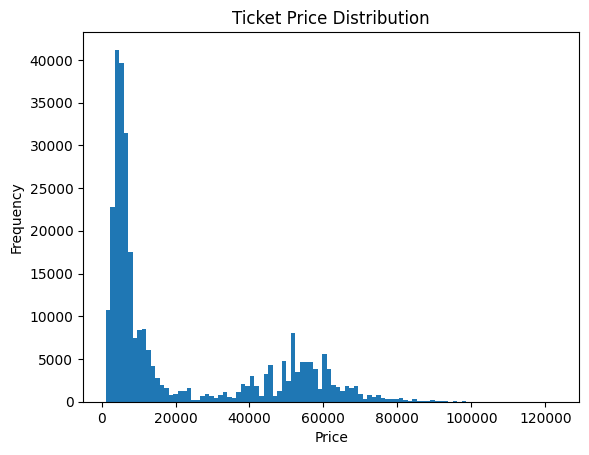

In [9]:
df.price.plot(kind = 'hist', bins = 100).set(title = 'Ticket Price Distribution', xlabel = 'Price')

[Text(0.5, 1.0, 'Log-Price Ticket Distribution'), Text(0.5, 0, 'Log-Price')]

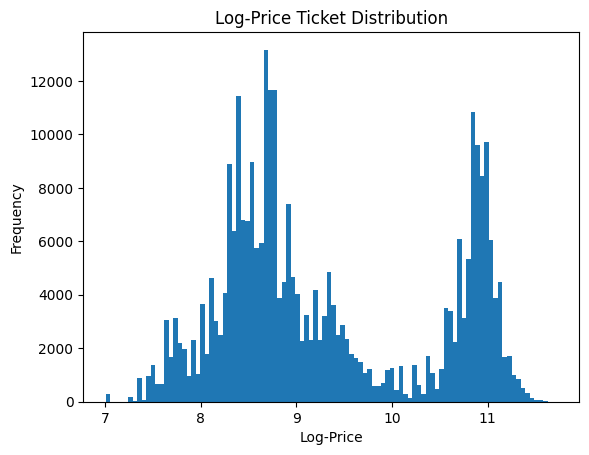

In [10]:
np.log(df.price).plot(kind = 'hist', bins = 100).set(title = 'Log-Price Ticket Distribution', xlabel = 'Log-Price')

Price is skewed and has many outliers in the original distribution (for more than 80K). Applying logarithm helps to center the data and remove some outliers.  

In [11]:
df['log_price'] = np.log(df.price)

## AIRLINE

In [12]:
df.airline.value_counts()

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

<Axes: title={'center': 'Airlines'}, xlabel='airline'>

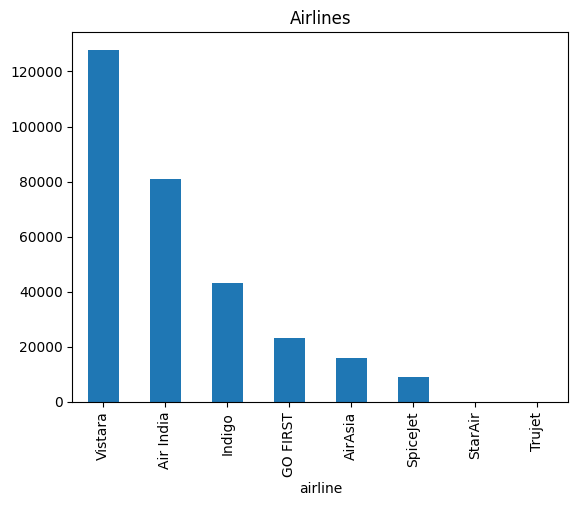

In [13]:
df.airline.value_counts().plot(kind = 'bar', title = 'Airlines')

[Text(0.5, 1.0, 'log-price distribution per airline')]

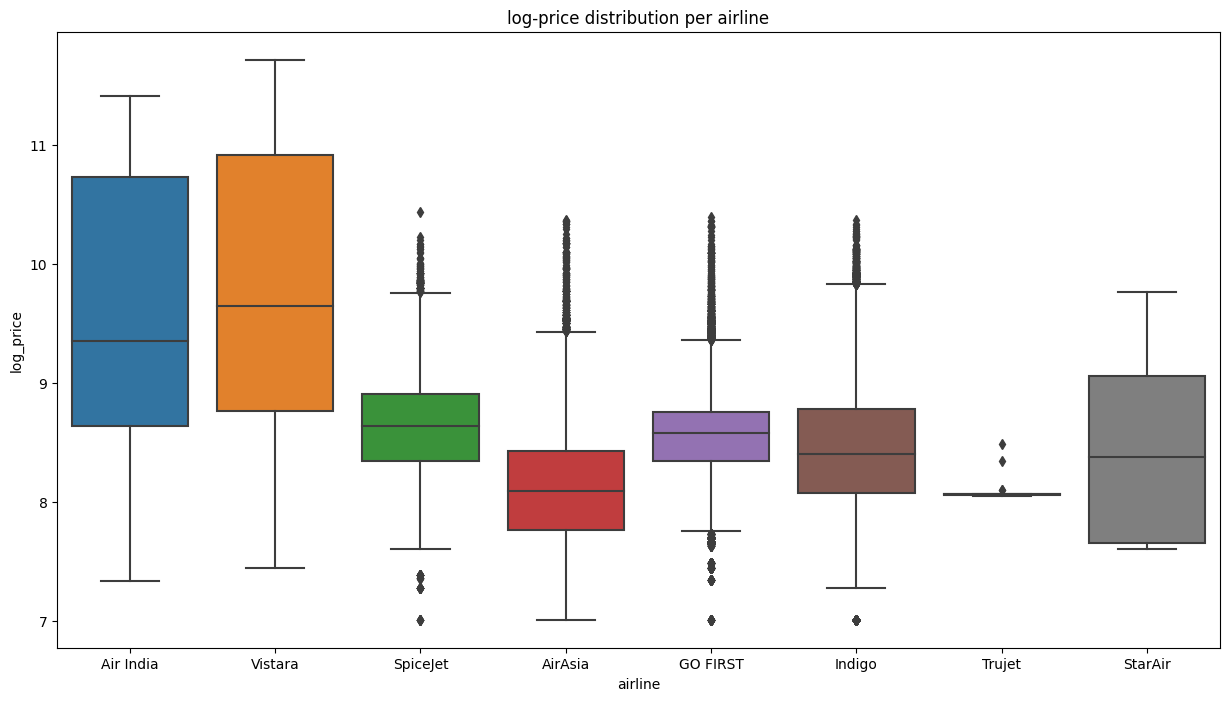

In [14]:
# Group data by airline and get boxplot for price
#df.groupby("airline").boxplot(column="price", figsize=(15,15)) 
plt.figure(figsize=(15,8))
sns.boxplot(x="airline", y="log_price", data=df).set(title='log-price distribution per airline')

Observations: 
- Log(price) distribution varies accross airlines. 
- Vistara & Air India are the more expensive ones. Could consider SpiceJet, AirAsia, GO_FIRST and Indigo as low-cost airlines. 
- Could be a variable suitable for A/B testing. 
- I suggest removing Trujet and StarAir because they have very few observations compared to the rest (41 & 61, respectively)

## Flight

In [15]:
df.flight.value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-6474       1
S5-150        1
SG-8480       1
6E-2914       1
6E-865        1
Name: count, Length: 1569, dtype: int64

<Axes: title={'center': 'Flight counts in data Distribution'}, xlabel='Times in database', ylabel='Frequency'>

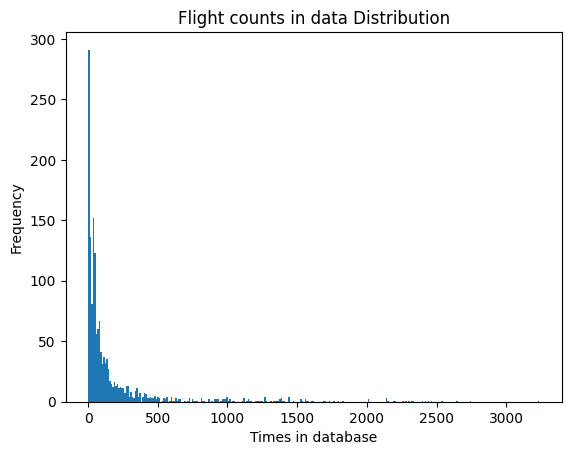

In [16]:
df.flight.value_counts().plot(kind = 'hist', bins = 300, title = 'Flight counts in data Distribution', xlabel = 'Times in database')

There are some overrepresented/underrepresented flights in the database. We might want to consider oversampling/undersampling depending on the application and model. 

## Source City (departure)

In [17]:
#df.source_city.value_counts()

In [18]:
df.origin.value_counts()

origin
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

<Axes: title={'center': 'Source Cities'}, xlabel='origin'>

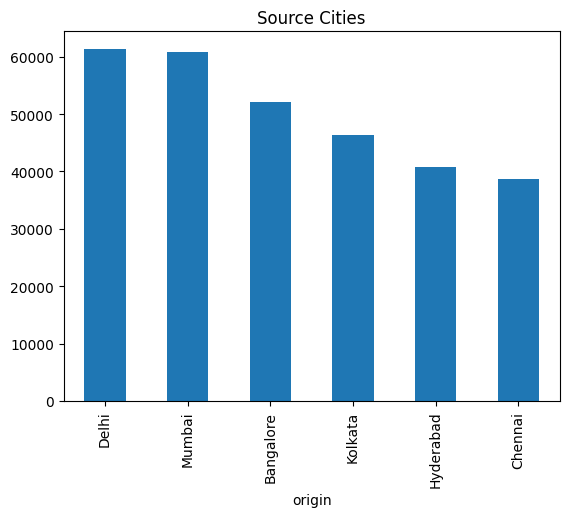

In [19]:
df.origin.value_counts().plot(kind = 'bar', title = 'Source Cities')

[Text(0.5, 1.0, 'Log-price distribution per source city')]

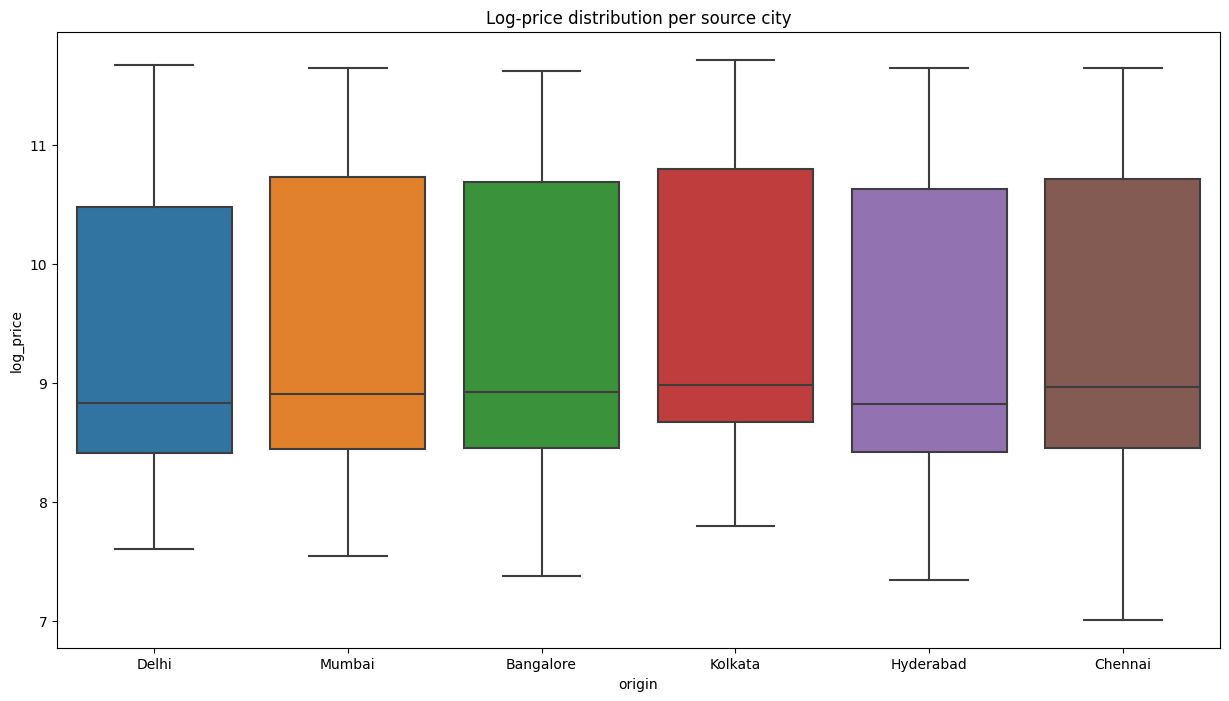

In [20]:
# Group data by source city and get boxplot for price
plt.figure(figsize=(15,8))
sns.boxplot(x="origin", y="log_price", data=df).set(title = 'Log-price distribution per source city')

We only have 6 source cities. Deli & Mumbai are the most popular source cities. Log-price distribution of tickets does not vary depending on the source city. 

## Departure Time 

In [21]:
df.departure_time.value_counts()

departure_time
Morning          75250
Evening          65417
Early_Morning    62042
Night            49504
Afternoon        46858
Late_Night        1190
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of departure time'}, xlabel='departure_time'>

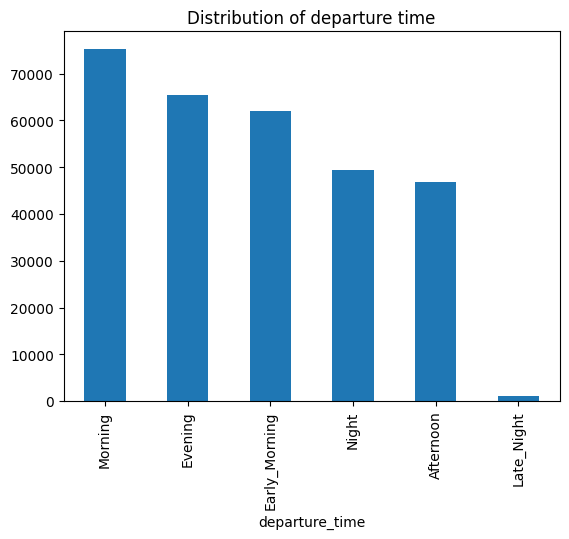

In [22]:
df.departure_time.value_counts().plot(kind = 'bar', title = 'Distribution of departure time')

[Text(0.5, 1.0, 'log-price distribution per departure time')]

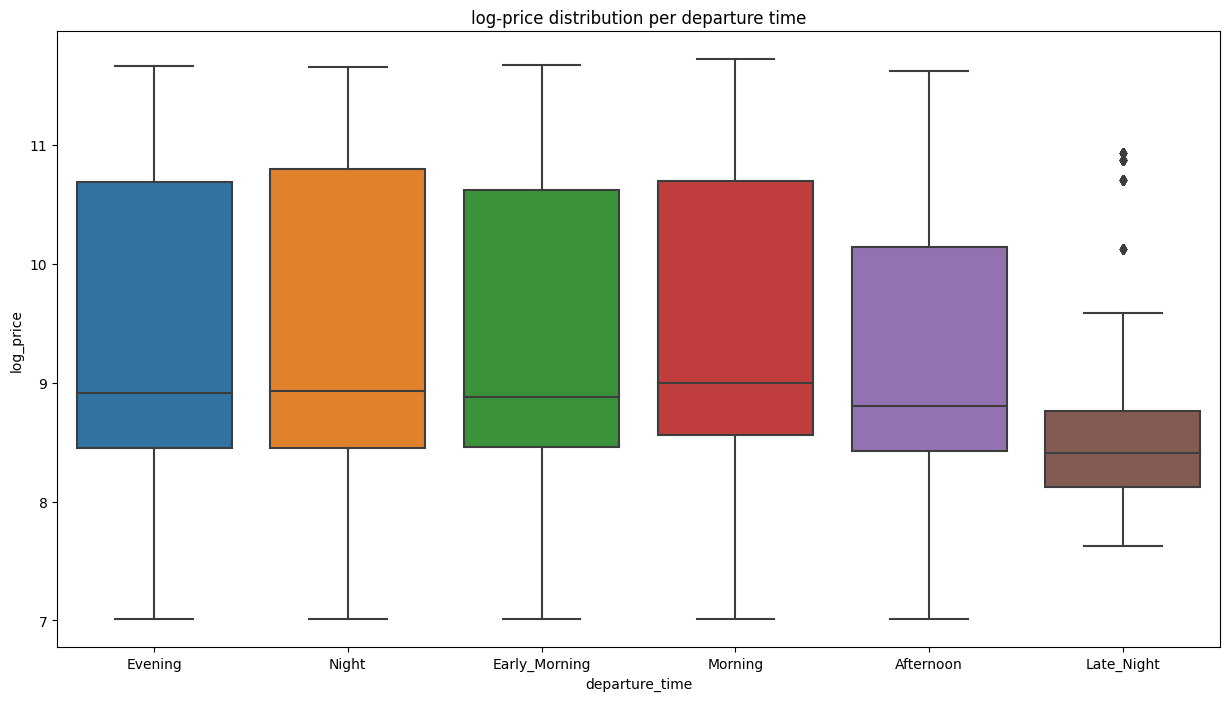

In [23]:
# Group data by source city and get boxplot for price
plt.figure(figsize=(15,8))
sns.boxplot(x="departure_time", y="log_price", data=df).set(title='log-price distribution per departure time')

Most flights ocurre in the early morning, morning or evening. Few flights on late-night. Log-price distribution is similar for all the departure times, except for late_night which is slightly cheaper. 

## Stops

In [24]:
df.stops.value_counts()

stops
1    250929
0     36044
2     13288
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of number of stops'}, xlabel='stops'>

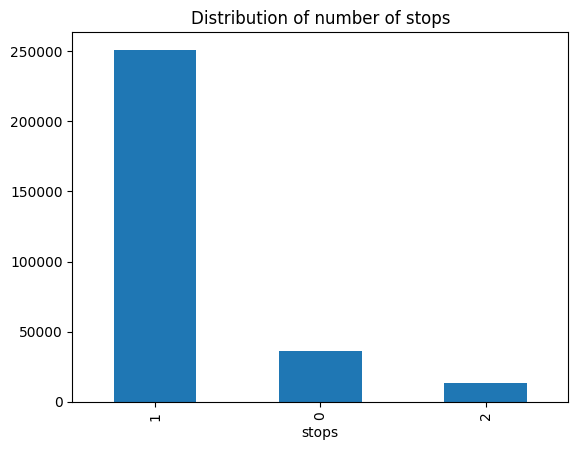

In [25]:
df.stops.value_counts().plot(kind = 'bar', title = 'Distribution of number of stops')

[Text(0.5, 1.0, 'log-price distribution per number of stops')]

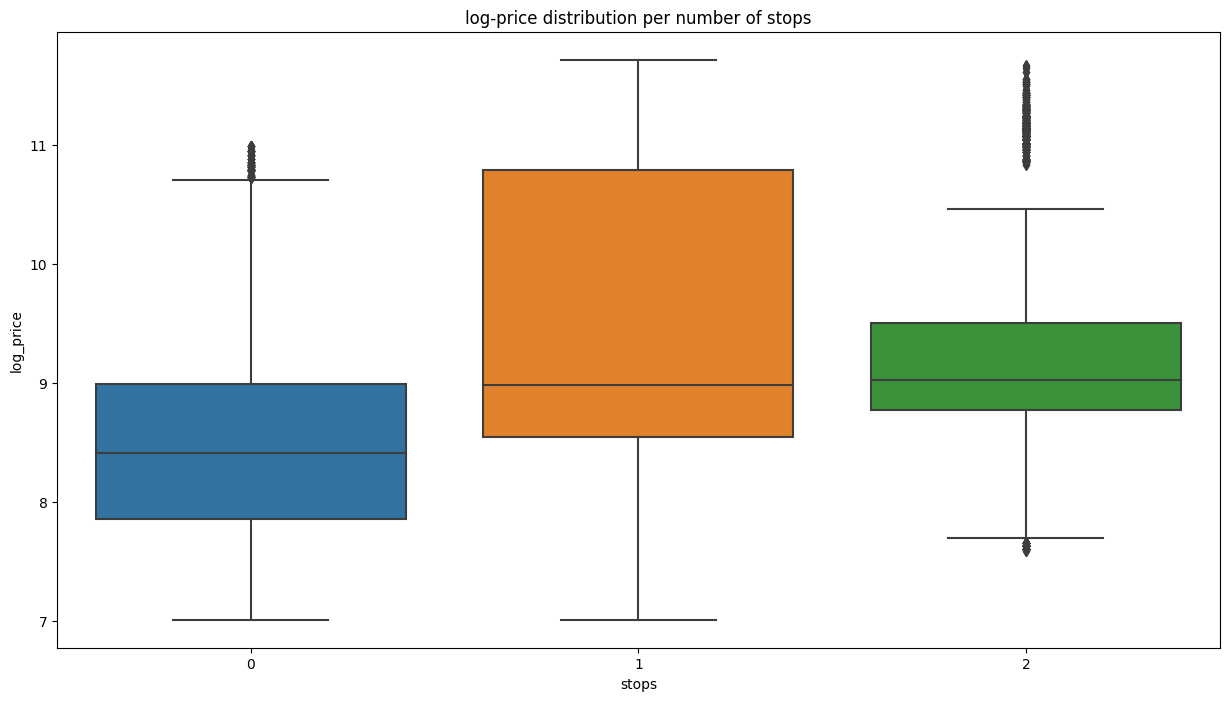

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x="stops", y="log_price", data=df).set(title='log-price distribution per number of stops')

Most flights have one stop. Surprisingly, one-stop and two+ stop tickets have a higher price than direct flights. 

## Arrival time

In [27]:
df.arrival_time.value_counts()

arrival_time
Night            93584
Evening          77104
Morning          63783
Afternoon        37908
Late_Night       14001
Early_Morning    13881
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of arrival times'}, xlabel='arrival_time'>

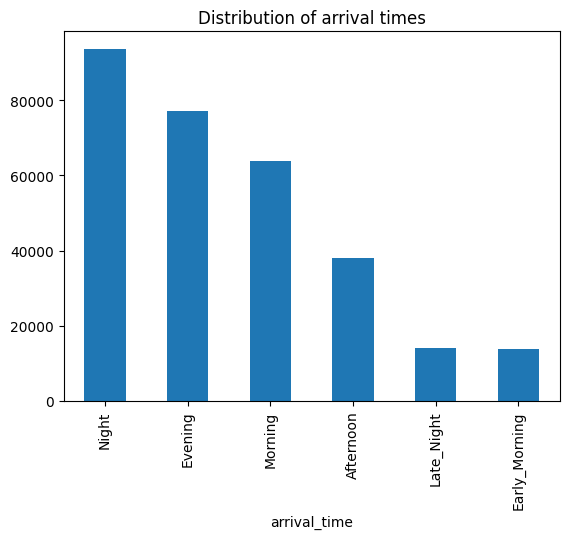

In [28]:
df.arrival_time.value_counts().plot(kind = 'bar', title = 'Distribution of arrival times')

[Text(0.5, 1.0, 'log-price distribution per arrival time')]

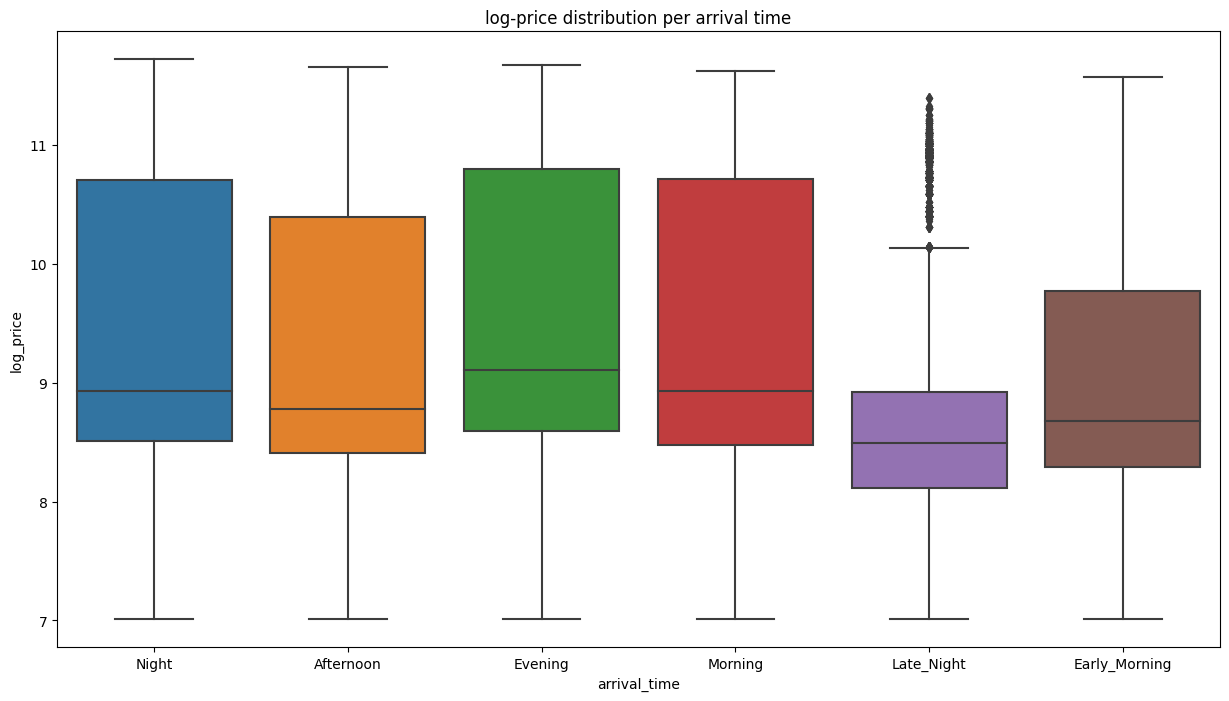

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x="arrival_time", y="log_price", data=df).set(title='log-price distribution per arrival time')

Most arrivals ocurre at night or in the evening. Few flights on early-morning or late-night. Log-price distribution is similar for all the arrival times, except for early moning and late night which are slightly cheaper. 

## Destination city

In [30]:
#df.destination_city.value_counts()

In [31]:
df.destination.value_counts()

destination
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of destination city'}, xlabel='destination'>

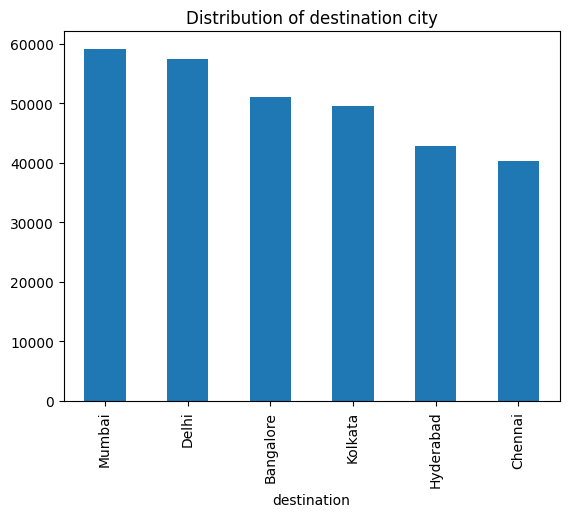

In [32]:
df.destination.value_counts().plot(kind = 'bar', title = 'Distribution of destination city')

[Text(0.5, 1.0, 'log-price distribution per destination city')]

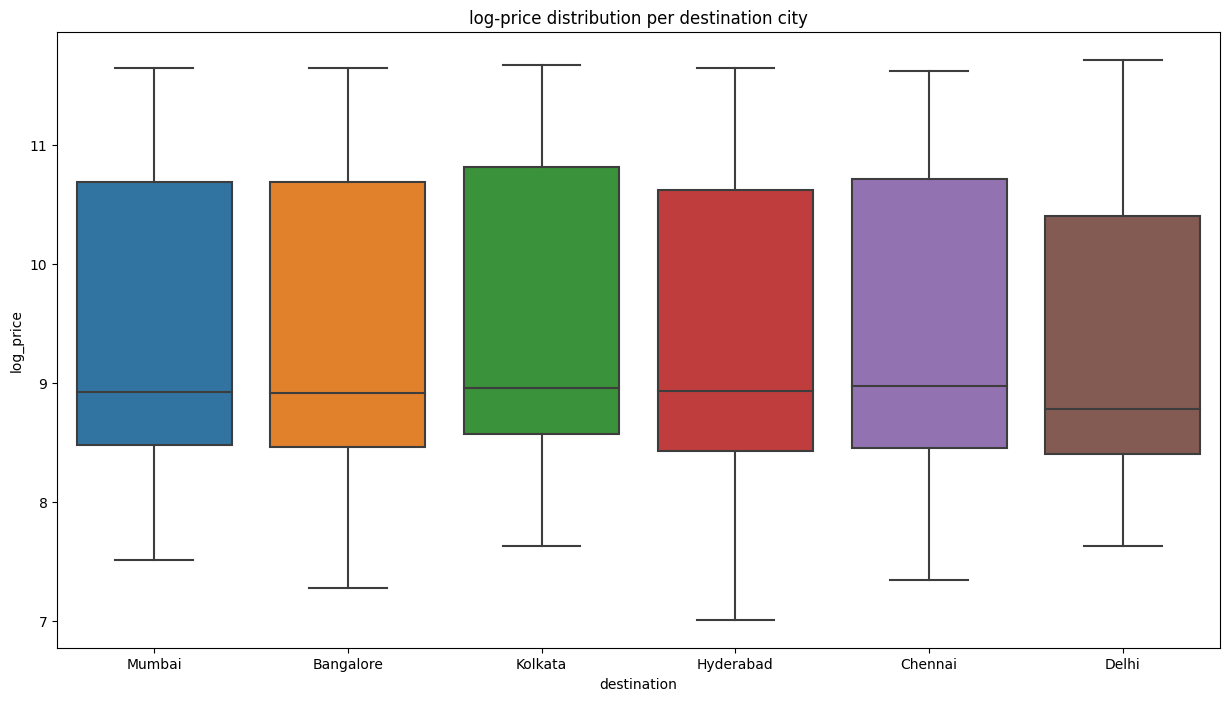

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x="destination", y="log_price", data=df).set(title='log-price distribution per destination city')

Mumbi and Delhi are the most popular destination cities. Log-price distribution of tickets dos not vary depending on the destination city. 

## Class

In [34]:
df['class'].value_counts()

class
Economy     206774
Business     93487
Name: count, dtype: int64

<Axes: xlabel='class'>

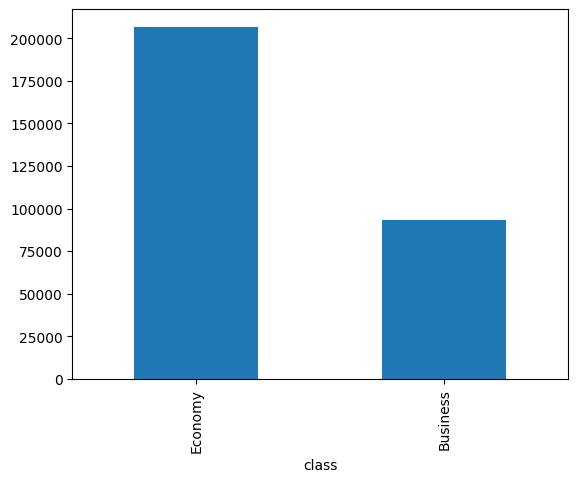

In [35]:
df['class'].value_counts().plot(kind = 'bar')

[Text(0.5, 1.0, 'log-price distribution per class')]

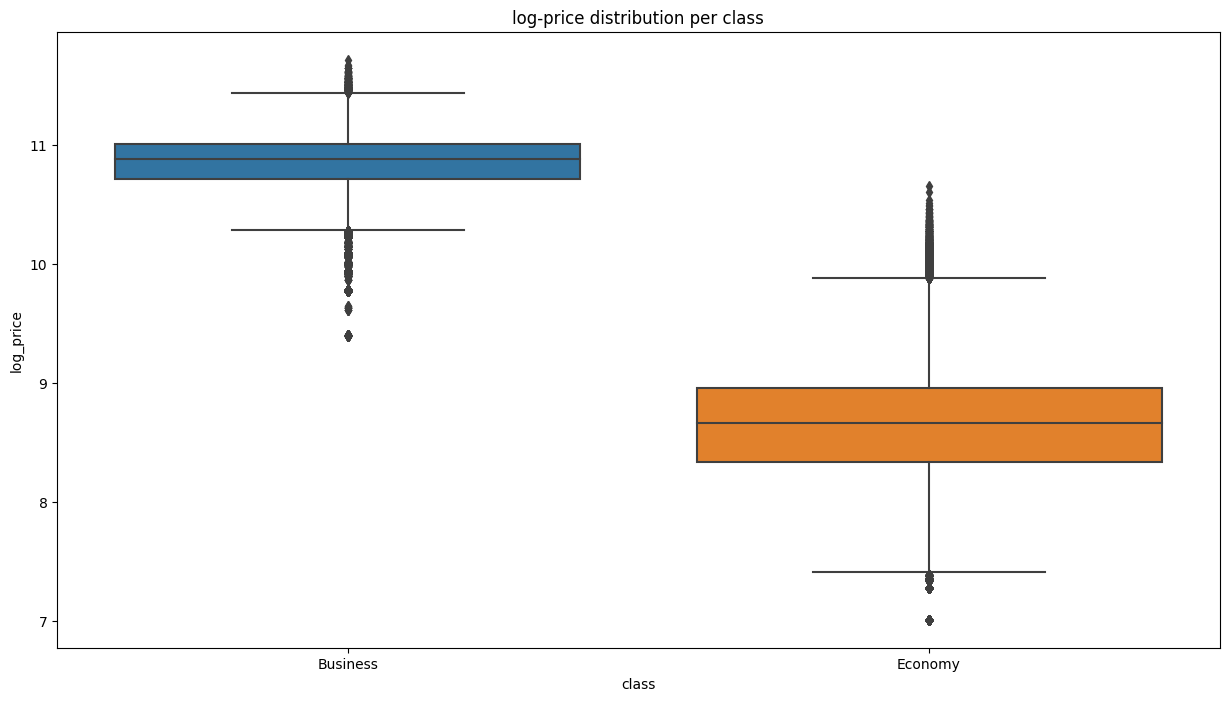

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x="class", y="log_price", data=df).set(title='log-price distribution per class')

Class imbalance for class of ticket. Might need to consider oversampling/undersampling. As expected Economy class tickets are cheaper than buisness class tickets. 

## Duration

<Axes: title={'center': 'Distribution of flight duration in hours'}, ylabel='Frequency'>

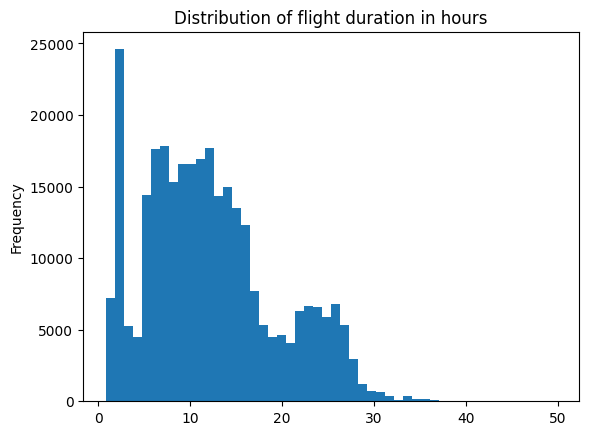

In [37]:
df.duration.plot(kind = 'hist', title = 'Distribution of flight duration in hours', bins = 50)

<Axes: title={'center': 'Distribution of flight log duration in hours'}, ylabel='Frequency'>

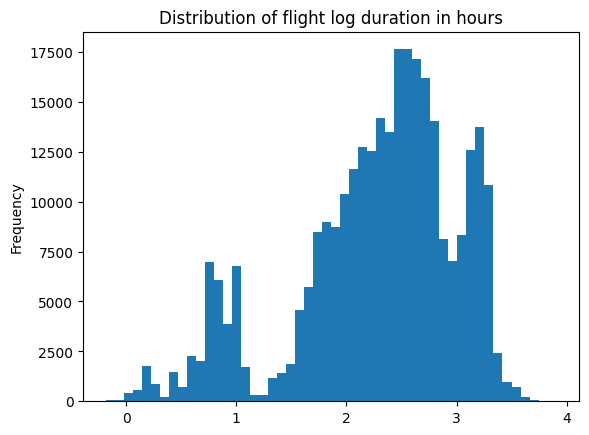

In [38]:
np.log(df.duration).plot(kind = 'hist', title = 'Distribution of flight log duration in hours', bins = 50)

<Axes: title={'center': 'Distribution of flight sqrt duration in hours'}, ylabel='Frequency'>

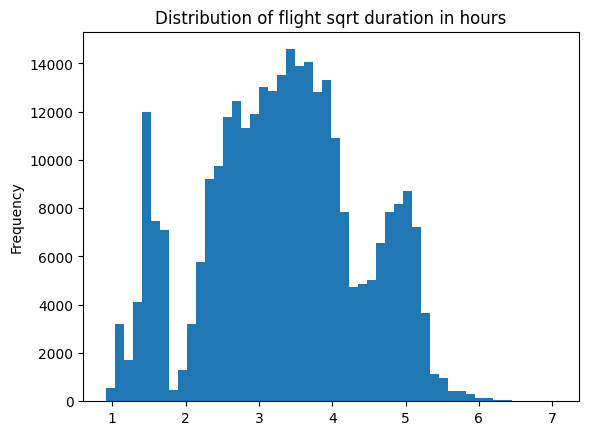

In [39]:
np.sqrt(df.duration).plot(kind = 'hist', title = 'Distribution of flight sqrt duration in hours', bins = 50)

In [ ]:
plt.figure(figsize=(15,8))
#sns.scatterplot(x = "duration", y = "log_price", data = df, hue = "class").set(title = 'log-Price vs Duration by Class of ticket', xlabel = 'duration', ylabel = 'Price')
sns.scatterplot(x = "duration", y = "log_price", data = df, hue = "class").\
set(title = 'log-Price vs Duration by Class of ticket', xlabel = 'duration', ylabel = 'Price')


[Text(0.5, 1.0, 'log-Price vs Duration by Class of ticket'),
 Text(0.5, 0, 'duration'),
 Text(0, 0.5, 'Price')]

[Text(0.5, 1.0, 'log-Price vs Duration by class of ticket')]

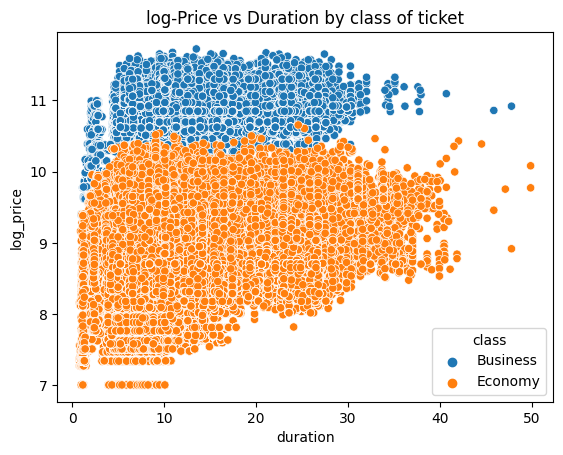

In [46]:
Psns.scatterplot(x="duration", y="log_price", data = df, hue = 'class').\
set(title = "log-Price vs Duration by class of ticket")

There is no clear linear relation between price and duration.

## Days Left

In [ ]:
#df.days_left.plot(kind = 'hist', title = 'Days left: days between booking and flight', bins = 50)

In [42]:
#plt.figure(figsize=(15,8))
#sns.scatterplot(x = "days_left", y = "log_price", data = df, hue = "class", alpha = 0.5).set(title = 'log-Price vs Days left by Class of ticket', xlabel = 'days_left', ylabel = 'log-Price')

No strong linear negative relation between log-price & days between booking and flight. 

### Summary & suggestions for cleanning: 
- Transform price into log(price).
- Vistara & Air India are the most expensive airlines. 
- We have some flights (routes) over/under represented. Consider oversampling? 
- We only have 6 source cities. Deli & Mumbai are the most popular source cities. Log-price distribution of tickets does not vary depending on the source city. 
- Log-price distribution of tickets does not vary depending on the deparutre time (late night flights are slightly cheaper).
- Most flights have one stop. Surprisingly, one-stop and two+ stop tickets have a higher price than direct flights. 
- Log-price distribution is similar for all the arrival times, except for early moning and late night which is slightly cheaper.
- Mumbi and Delhi are the most popular destination cities. Log-price distribution of tickets dos not vary depending on the destination city. 
- Class imbalance for class of ticket. Might need to consider oversampling/undersampling. As expected Economy class tickets are cheaper than buisness class tickets. 
- There is no clear linear relation between price and duration.
- No strong linear negative relation between log-price & days between booking and flight. 
- The business.csv and economy.csv have the "raw" data from which we could try to recover the date (discuss)
- Duration is skewed. Need to discuss approapriate transformation. 